# 1 - Settings

## 1.1 -  Libraries installation

In [5]:
!pip install -U librosa
!pip freeze | grep librosa
!pip install resampy

librosa==0.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 15.7 MB/s eta 0:00:00


In [2]:
colab = True

In [3]:
if colab:
    !pip install SoundFile
    from google.colab import drive
    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials
    import zipfile

    # Google Authentication
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

    # Download code files
    downloaded = drive.CreateFile({'id':"1js1fz4Bu98NIds4cErL7NdT1efxavixp"})
    downloaded.GetContentFile('Code.zip')

    # Extract files to temporary location in Google Drive
    with zipfile.ZipFile('Code.zip', 'r') as zip_file:
        zip_file.extractall()

    # Download data files
    downloaded = drive.CreateFile({'id':"1seDpWl9c28V-kCQxjhkuaws7i8d-_R31"})
    downloaded.GetContentFile('Data.zip')

    # Extract files to temporary location in Google Drive
    with zipfile.ZipFile('Data.zip', 'r') as zip_file:
        zip_file.extractall()

In [2]:
from Preprocessing import *
import librosa
import numpy as np
import random
import tensorflow as tf
from IPython.display import Audio
#import resampy

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
basedir = "gdrive/MyDrive/Deep Learning For Ecology/Bird Call Detection Model/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
fil = "Audio/12_audio_24.wav"
audio, sr = librosa.load(fil, sr=None)
Audio(audio[:4*sr], rate=sr)

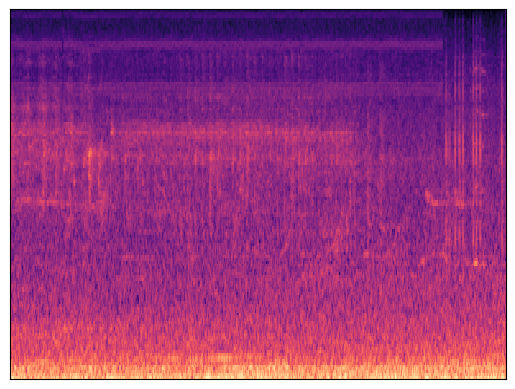

In [10]:
S = librosa.feature.melspectrogram(y=audio[:4*sr], n_fft=n_fft,
                                     hop_length=hop_length, n_mels=n_mels)
#S = librosa.feature.melspectrogram(y=test_audio)
S_db = librosa.power_to_db(S, ref=np.max)
# 2 View the mel spectrogram before doing anything else. Try and view a spectrogram
# that contains some type of sound.
librosa.display.specshow(S_db)
plt.show()

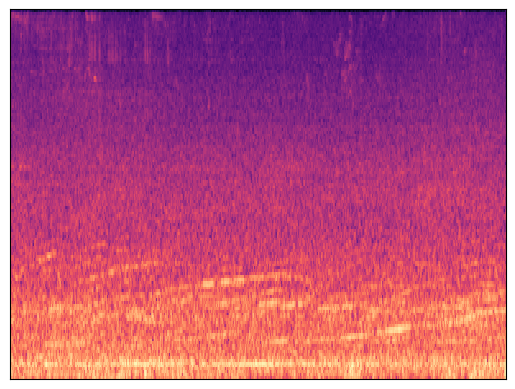

In [11]:
y_8k = librosa.resample(audio, orig_sr=sr, target_sr=8000)
S = librosa.feature.melspectrogram(y=y_8k[:4*sr], n_fft=n_fft,
                                     hop_length=hop_length, n_mels=n_mels)
#S = librosa.feature.melspectrogram(y=test_audio)
S_db = librosa.power_to_db(S, ref=np.max)
# 2 View the mel spectrogram before doing anything else. Try and view a spectrogram
# that contains some type of sound.
librosa.display.specshow(S_db)
plt.show()

In [19]:
positive_class = ['1'] # which labels should be bundled together for the positive  class
negative_class = ['0'] # which labels should be bundled together for the negative  class


# Data hyper-parameters
# -----------------------------
lowpass_cutoff = 2000 # Cutt off for low pass filter
downsample_rate = 16000 # Frequency to downsample to
nyquist_rate = 8000 # Nyquist rate (half of sampling rate)
segment_duration = 4 # how long should a segment be


# Spectrogram hyper-parameters
# -----------------------------
n_fft = 1024 # Hann window length
hop_length = 256 # Sepctrogram hop size
n_mels = 128 # Spectrogram number of mells
f_min = 2000 # Spectrogram, minimum frequency for call
f_max = 7000 # Spectrogram, maximum frequency for call

# Don't change these
# -----------------------------
species_folder = '.' # Should contain /Audio and /Annotations, don't change this
file_type = 'svl' # don't change this
audio_extension = '.wav' # don't change this

In [5]:
# This takes about 1 minute
pre_pro = Preprocessing(species_folder, lowpass_cutoff,
                downsample_rate, nyquist_rate,
                segment_duration,
                positive_class, negative_class,n_fft,
                hop_length, n_mels, f_min, f_max, file_type,
                audio_extension)

X, Y = pre_pro.create_dataset(False)

Processing: 19_19_fermat_15
Found file
Filtering...
Downsampling...
19_19_fermat_15
Reading annotations...
Processing: 23_2-2-2024=20_53_19
Found file
Filtering...
Downsampling...
23_2-2-2024=20_53_19
Reading annotations...
Processing: 6_2-2-2024=14_46_17
Found file
Filtering...
Downsampling...
6_2-2-2024=14_46_17
Reading annotations...
Processing: 9_2-2-2024=21_1_26
Found file
Filtering...
Downsampling...
9_2-2-2024=21_1_26
Reading annotations...
Processing: 6_2-2-2024=14_43_57
Found file
Filtering...
Downsampling...
6_2-2-2024=14_43_57
Reading annotations...
Processing: 23_2-2-2024=20_39_55
Found file
Filtering...
Downsampling...
23_2-2-2024=20_39_55
Reading annotations...
Processing: 15_audio_34
Found file
Filtering...
Downsampling...
15_audio_34
Reading annotations...
Processing: 15_audio_79
Found file
Filtering...
Downsampling...
15_audio_79
Reading annotations...
Processing: 8_emmanuel_5
Found file
Filtering...
Downsampling...
8_emmanuel_5
Reading annotations...
Processing: 23_2-

In [6]:
x_file = basedir+'x.npy'
y_file = basedir+'y.npy'
np.save(x_file, X)
np.save(y_file, Y)

In [16]:
x_file = basedir+'x.npy'
y_file = basedir+'y.npy'

with open(x_file, 'rb') as f:
    X = np.load(f)
with open(y_file, 'rb') as f:
    Y = np.load(f)

### Data shape

In [7]:
print(X.shape)
print(Y.shape)

(2253, 64000)
(2253,)


In [8]:
id = 176
test_audio = X[id]
test_audio.shape
print(Y[id])
Audio(test_audio, rate=downsample_rate)

0


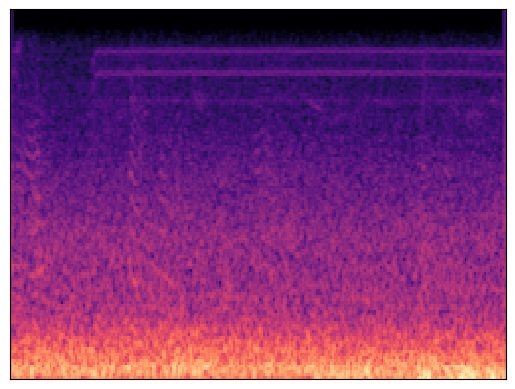

In [9]:
S_normalized = librosa.feature.melspectrogram(y=test_audio, n_fft=n_fft,
                                     hop_length=hop_length, n_mels=n_mels)
image = librosa.power_to_db(S_normalized, ref=np.max)
image_np = np.asmatrix(image)
image_np_scaled_temp = (image_np - np.min(image_np))
image_np_scaled = image_np_scaled_temp / np.max(image_np_scaled_temp)
mean = image.flatten().mean()
std = image.flatten().std()
eps=1e-8
spec_norm = (image - mean) / (std + eps)
spec_min, spec_max = spec_norm.min(), spec_norm.max()
spec_scaled = (spec_norm - spec_min) / (spec_max - spec_min)

# 5 View the normalised spectrogram
librosa.display.specshow(spec_scaled)
# 6 If it looks good, then you're done
plt.show()

# Audio Pre-processing


The data in ``X`` and ``Y`` is not fully pre-processed. `X` has segments of audio which have been extracted from the audio files along with their label in `Y`.

Here:
*   We will implement a function called ``audio_to_spectrogram(audio)`` which takes in one audio signal, and returns a mel-spectrogram.

*   This function implement a normalization



In [23]:
def audio_to_spectrogram(audio):
  waveform = audio / tf.int16.max
  S = librosa.feature.melspectrogram(y=audio, n_fft=n_fft,
                                     hop_length=hop_length, n_mels=n_mels)
  image = librosa.power_to_db(S, ref=np.max)

  image_np = np.asmatrix(image)
  image_np_scaled_temp = (image_np - np.min(image_np))
  image_np_scaled = image_np_scaled_temp / np.max(image_np_scaled_temp)
  mean = image.flatten().mean()
  std = image.flatten().std()
  eps=1e-8
  spec_norm = (image - mean) / (std + eps)
  spec_min, spec_max = spec_norm.min(), spec_norm.max()
  spec_scaled = (spec_norm - spec_min) / (spec_max - spec_min)

  return spec_scaled

Let's visualize some examples of spectrograms

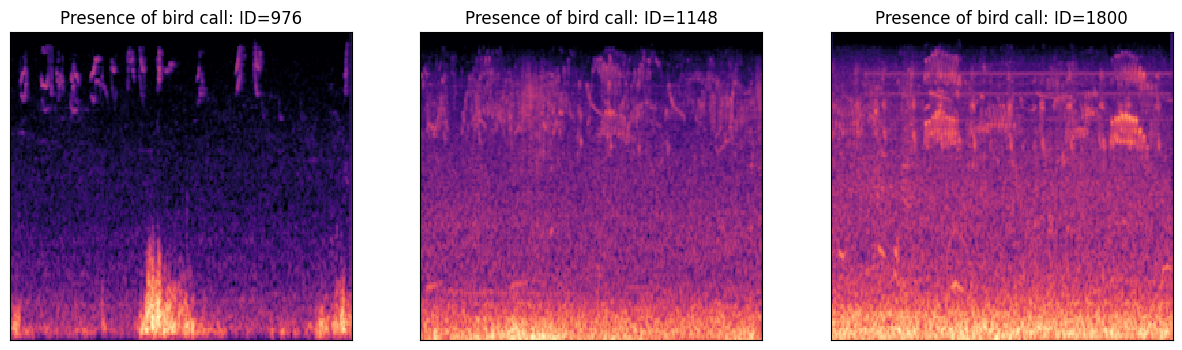

In [11]:
positive_indexes = np.random.choice(np.where(Y == positive_class[0])[0], size=3, replace=False)

fig, ax = plt.subplots(1, len(positive_indexes), figsize=(15, 4))
for i in range(len(positive_indexes)):
  X_s = audio_to_spectrogram(X[positive_indexes[i]])
  librosa.display.specshow(X_s, ax=ax[i])
  ax[i].set_title("Presence of bird call: ID="+str(positive_indexes[i]))
plt.show()

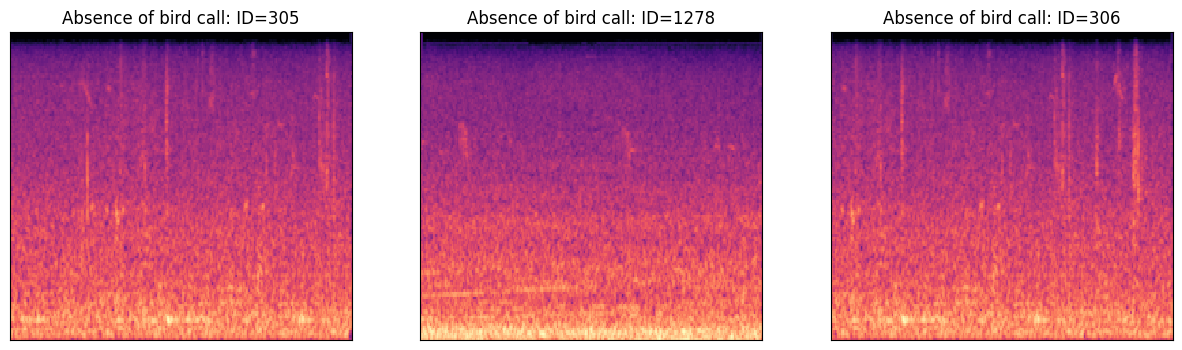

In [12]:
negative_indexes = np.random.choice(np.where(Y == negative_class[0])[0], size=3, replace=False)

fig, ax = plt.subplots(1, len(negative_indexes), figsize=(15, 4))
for i in range(len(negative_indexes)):
  X_s = audio_to_spectrogram(X[negative_indexes[i]])
  librosa.display.specshow(X_s, ax=ax[i])
  ax[i].set_title("Absence of bird call: ID="+str(negative_indexes[i]))
plt.show()

In [24]:
def convert_all_to_image(segments):

  spectrograms = []
  for segment in segments:
      spectrograms.append(audio_to_spectrogram(segment))

  return np.array(spectrograms)

In [14]:
X_S = convert_all_to_image(X)

In [15]:
del X

In [16]:
np.save(basedir+'x_s.npy', X_S)

In [14]:
with open(basedir+'x_s.npy', 'rb') as f:
    X_S = np.load(f)

In [17]:
X_S.shape

(2253, 128, 251)

In [18]:
unique, counts = np.unique(Y, return_counts=True)
original_distribution = dict(zip(unique, counts))
print('Data distribution:',original_distribution)

Data distribution: {'0': 516, '1': 1737}


## Data Augmentation

In [19]:
def augment_one_spectrogram(spectrogram, true_target, time_mask_length = 2, frequency_mask_width = 2):
  ts = np.random.randint(0, spectrogram.shape[1] - time_mask_length, size=3)
  new_spectrogram = np.copy(spectrogram)
  for t in ts:
    new_spectrogram[:, t:(t + time_mask_length)] = 0
  fs = np.random.randint(0, new_spectrogram.shape[0] - frequency_mask_width, size=3)
  for f in fs:
    new_spectrogram[f:(f + frequency_mask_width), :] = 0

  return new_spectrogram, true_target

In [20]:
def randomly_select_presence(all_spectrograms, targets):

  # Find all the indices where there is a gibbon example
  presence_indices = np.where(targets =='1')[0]

  # Randomly select index
  random_index = random.randint(0,len(presence_indices)-1)

  return all_spectrograms[presence_indices[random_index]]

In [21]:
def randomly_select_absence(all_spectrograms, targets):

  # Find all the indices where there is a no-gibbon example
  absence_indices = np.where(targets =='0')[0]

  # Randomly select index
  random_index = random.randint(0,len(absence_indices)-1)

  return all_spectrograms[absence_indices[random_index]]

In [22]:
def generate_new_presence_spectrograms(all_spectrograms, all_targets, quantity):

  new_spectrograms = []
  new_targets = []

  for i in range (0, quantity):
    presence_spectrogram = randomly_select_presence(all_spectrograms, all_targets)
    augmented_spectrogram, augmented_target = augment_one_spectrogram(presence_spectrogram,
                                                                      '1')

    new_spectrograms.append(augmented_spectrogram)
    new_targets.append(augmented_target)

  return np.asarray(new_spectrograms), np.asarray(new_targets)

In [23]:
def generate_new_absence_spectrograms(all_spectrograms, all_targets, quantity):

  new_spectrograms = []
  new_targets = []

  for i in range (0, quantity):
    absence_spectrogram = randomly_select_absence(all_spectrograms, all_targets)
    augmented_spectrogram, augmented_target = augment_one_spectrogram(absence_spectrogram,
                                                                      '0')

    new_spectrograms.append(augmented_spectrogram)
    new_targets.append(augmented_target)

  return np.asarray(new_spectrograms), np.asarray(new_targets)

In [24]:
new_presence, new_targets = generate_new_presence_spectrograms(X_S, Y, 500)

In [25]:
print(new_presence.shape)
print(new_targets.shape)

(500, 128, 251)
(500,)


484


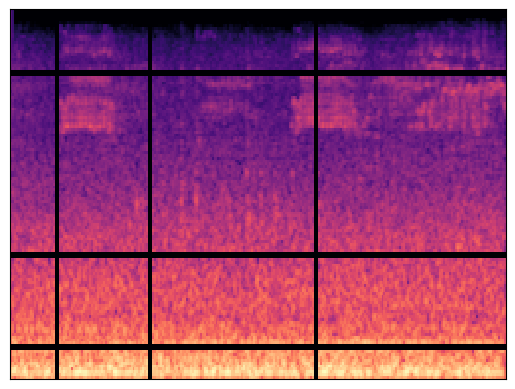

In [26]:
idx = np.random.choice(range(len(new_presence)))
librosa.display.specshow(new_presence[idx])# TO DO)
print(idx)

In [27]:
X_positive = np.concatenate([X_S[np.where(Y =='1')], new_presence])
X_positive = np.asarray(X_positive)
print(X_positive.shape)

Y_positive = np.concatenate([Y[np.where(Y =='1')], new_targets])
Y_positive = np.asarray(Y_positive)
print(Y_positive.shape)

(2237, 128, 251)
(2237,)


In [28]:
new_absence, new_targets = generate_new_absence_spectrograms(X_S, Y,500)

In [29]:
print(new_absence.shape)
print(new_targets.shape)

(500, 128, 251)
(500,)


134


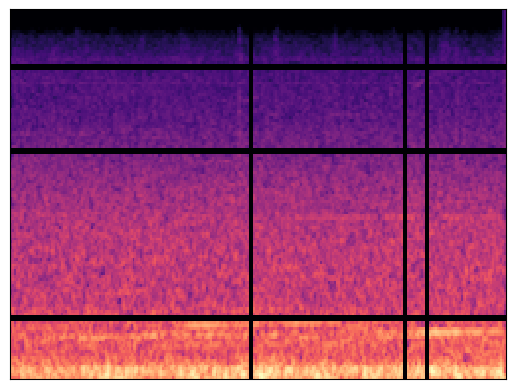

In [30]:
idx = np.random.choice(range(len(new_absence)))
librosa.display.specshow(new_absence[idx])
print(idx)

In [37]:
X_negatives = np.concatenate([X_S[np.where(Y =='0')], new_absence])
X_negatives = np.asarray(X_negatives)
print(X_negatives.shape)

Y_negatives = np.concatenate([Y[np.where(Y =='0')], new_targets])
Y_negatives = np.asarray(Y_negatives)
print(Y_negatives.shape)

NameError: name 'X_S' is not defined

In [32]:
X_dataset = np.concatenate([X_positive, X_negatives])
Y_dataset = np.concatenate([Y_positive, Y_negatives])

In [33]:
print(X_dataset.shape)
print(Y_dataset.shape)

(3253, 128, 251)
(3253,)


In [34]:
np.save(basedir+'x_dataset.npy', X_dataset)
np.save(basedir+'y_dataset.npy', Y_dataset)

In [38]:
with open(basedir+'x_dataset.npy', 'rb') as f:
    X_dataset = np.load(f)
with open(basedir+'y_dataset.npy', 'rb') as f:
    Y_dataset = np.load(f)

In [39]:
X_dataset = np.expand_dims(X_dataset, axis=-1)

In [40]:
print(X_dataset.shape)
print(Y_dataset.shape)

(3253, 128, 251, 1)
(3253,)


In [41]:
from tensorflow.keras.utils import to_categorical
call_order = ['0','1']

# Converting categorical string labels ('gibbons' and 'no-gibbon) to 0s and 1s
for index, call_type in enumerate(call_order):
    Y_dataset = np.where(Y_dataset == call_type, index, Y_dataset)

Y_dataset = to_categorical(Y_dataset,
                             num_classes = 2)

In [42]:
print(X_dataset.shape)
print(Y_dataset.shape)

(3253, 128, 251, 1)
(3253, 2)


In [39]:
del X_S, Y

In [40]:
X_dataset.shape

(3253, 128, 251, 1)

# CNN Model

In [53]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPool2D, Conv2D, Input
from tensorflow.keras.models import Sequential

from keras.models import Model
INPUT_SHAPE = (X_dataset.shape[1], X_dataset.shape[2], X_dataset.shape[3])

inputs = Input(shape=INPUT_SHAPE)
x = inputs

# Apply input dropout
x = Dropout(0.2)(x)

x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# Apply input dropout
x = Dropout(0.2)(x)

x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# Apply input dropout
x = Dropout(0.2)(x)

x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Flatten()(x)
x = Dense(2, activation='softmax')(x)

outputs = x

model1 = Model(inputs, outputs)
print(model1.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 251, 1)]     0         
                                                                 
 dropout_5 (Dropout)         (None, 128, 251, 1)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 126, 249, 32)      320       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 124, 32)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 63, 124, 32)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 61, 122, 32)       9248      
                                                           

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_dataset, Y_dataset, test_size=0.2, random_state=42)

In [56]:
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history1 = model1.fit(X_train,
          y_train ,
          epochs=4, validation_data=(X_val, y_val),
          batch_size=32)

Epoch 1/4
82/82 [==============================] - 113s 1s/step - loss: 0.6414 - accuracy: 0.6787 - val_loss: 0.6511 - val_accuracy: 0.7035
Epoch 2/4
82/82 [==============================] - 115s 1s/step - loss: 0.6036 - accuracy: 0.6856 - val_loss: 0.5577 - val_accuracy: 0.7235
Epoch 3/4
82/82 [==============================] - 122s 1s/step - loss: 0.5664 - accuracy: 0.7141 - val_loss: 0.5620 - val_accuracy: 0.7097
Epoch 4/4
82/82 [==============================] - 114s 1s/step - loss: 0.5661 - accuracy: 0.7221 - val_loss: 0.5432 - val_accuracy: 0.7296


## Test CNN Model

In [17]:
test_files = np.loadtxt('DataFiles/TestingFiles.txt', dtype=str, usecols=0)

In [67]:
len(test_files)

140

In [20]:
pre_pro_test = Preprocessing(species_folder, lowpass_cutoff,
                downsample_rate, nyquist_rate,
                segment_duration,
                positive_class, negative_class,n_fft,
                hop_length, n_mels, f_min, f_max, file_type,
                audio_extension)
pre_pro_test.training_files = './DataFiles/TestingFiles.txt'
X_test, Y_test = pre_pro_test.create_dataset(False)

Processing: 21_3-2-2024=7_19_54
Found file
Filtering...
Downsampling...
21_3-2-2024=7_19_54
Reading annotations...
Processing: 23_2-2-2024=20_39_19
Found file
Filtering...
Downsampling...
23_2-2-2024=20_39_19
Reading annotations...
Processing: 19_19_fermat_12
Found file
Filtering...
Downsampling...
19_19_fermat_12
Reading annotations...
Processing: 17_20240203_081105
Processing: 23_2-2-2024=20_42_49
Found file
Filtering...
Downsampling...
23_2-2-2024=20_42_49
Reading annotations...
Processing: 20_r23_dariose
Found file
Filtering...
Downsampling...
20_r23_dariose
Reading annotations...
Processing: 3_2-2-2024=22_1_6
Found file
Filtering...
Downsampling...
3_2-2-2024=22_1_6
Reading annotations...
Processing: 24_2
Found file
Filtering...
Downsampling...
24_2
Reading annotations...
Processing: 18_3-2-2024=6_55_2
Found file
Filtering...
Downsampling...
18_3-2-2024=6_55_2
Reading annotations...
Processing: 9_2-2-2024=21_2_1
Found file
Filtering...
Downsampling...
9_2-2-2024=21_2_1
Reading ann

In [21]:
indexes = range(X_test.shape[0])
chosen_indexes = np.random.choice(indexes, size=500, replace=False)
X_test = X_test[chosen_indexes,:]
Y_test = Y_test[chosen_indexes]
print(X_test.shape)
print(Y_test.shape)

(500, 64000)
(500,)


In [25]:
X_test_S = convert_all_to_image(X_test)

In [26]:
np.save(basedir+'X_test_S.npy', X_test_S)
np.save(basedir+'Y_test.npy', X_test_S)

In [ ]:
with open(basedir+'X_test_S.npy', 'rb') as f:
    X_test_S = np.load(f)
with open(basedir+'y_dataset.npy', 'rb') as f:
    Y_dataset = np.load(f)

In [29]:
call_order = ['0', '1']
X_test_dataset = np.expand_dims(X_test_S, axis=-1)
for index, call_type in enumerate(call_order):
    Y_test_dataset = np.where(Y_test == call_type, index, Y_test)
Y_test_dataset = Y_test_dataset.astype(int)

In [30]:
print(X_test_dataset.shape)
print(Y_test_dataset.shape)

(500, 128, 251, 1)
(500,)


In [100]:
y_pred_probs = model1.predict(X_test_dataset)
y_pred = np.argmax(y_pred_probs, axis=1)

16/16 [==============================] - 4s 244ms/step


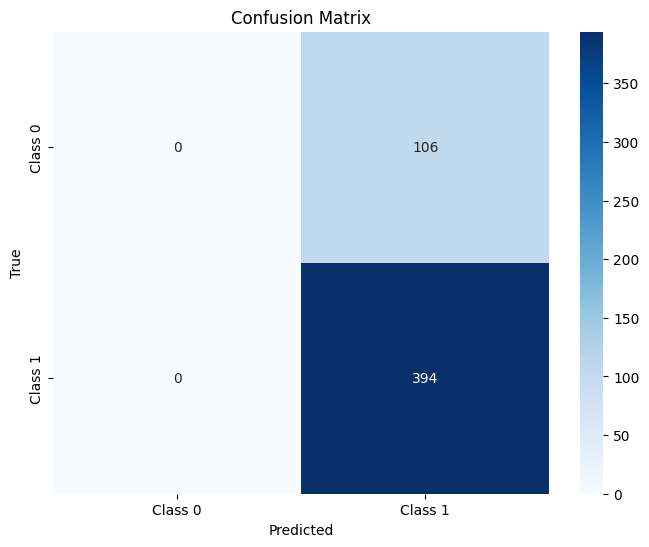

In [101]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(Y_test_dataset, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

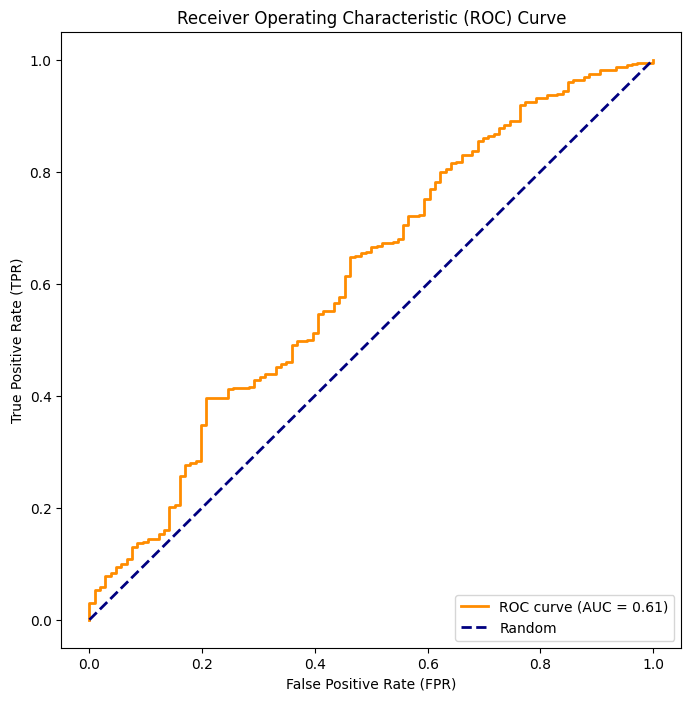

In [111]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test_dataset, y_pred_probs[:,1])

roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [57]:
test_loss, test_acc = model1.evaluate(X_test_dataset,  Y_test_dataset, verbose=2)

21/21 - 8s - loss: 0.5432 - accuracy: 0.7296 - 8s/epoch - 364ms/step


# Transfer Learning with VGG16

In [4]:
from tensorflow.keras.applications import VGG16, ResNet50V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

In [9]:
INPUT_SHAPE = (128, 251, 3)
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=INPUT_SHAPE)
base_model.trainable = False
inputs = Input(shape=INPUT_SHAPE)

x = base_model(inputs, training=False)

x = Flatten()(x) # flatten everything from the current model
outputs = Dense(2, activation='softmax')(x) # Add a softmax layer
model2 = Model(inputs, outputs) # bring everything together

model2.compile(loss='categorical_crossentropy',
              optimizer=Adam(1e-5),
              metrics=['accuracy'])


In [10]:
model2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 128, 251, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 4, 8, 2048)        23564800  
                                                                 
 flatten_3 (Flatten)         (None, 65536)             0         
                                                                 
 dense_3 (Dense)             (None, 2)                 131074    
                                                                 
Total params: 23695874 (90.39 MB)
Trainable params: 131074 (512.01 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [44]:
X_stacked = np.concatenate((0.3*X_dataset, 0.59*X_dataset, 0.11*X_dataset), axis=-1)
print(X_stacked.shape)

(3253, 128, 251, 3)


In [ ]:
del X_dataset

In [ ]:
history2 = model2.fit(X_stacked,
          Y_dataset ,
          epochs=4,
          batch_size=32, validation_data=(X_val, y_val))

# Transfer Learning with ResNet50

In [16]:
history

# Fusion of VGG16 and ResNet50